###### Note: Reads xlsx and writes csv TTS.csv.

### A quick look at some data from LBNL to see if it's different from NREL


#### What's going on in this notebook

##### Purpose: 

This notebook is a first look at the solar installation/cost data for from LBNL.  

#####  Goals:
* read the data (2 files)
    * __done__


* put it together into 1 df
    * __done__


* save it out as csv
    * __done__


* look at installations per year 
    * __has data through the end of 2016__


* look for NaNs
    * __doesn't have any, oops - it does, they just don't read in as NaNs because they have flag values.  This is going to require some magic when reading the file.__


* look for dups
    * __none, out of the gate__


* take a look at the variables
    * __pretty different.  Here's a list of the variables and the number of unique values in each.  The ones with a smallish number are probably either boolean or categorical.  They have flag values and some real values.__

```
[('level_0', 1094909),
 ('index', 700000),
 ('Data Provider', 66),
 ('System ID (from Data Provider)', 1025243),
 ('System ID (Tracking the Sun)', 1094909),
 ('Installation Date', 5512),
 ('System Size', 53346),
 ('Total Installed Price', 188653),
 ('Appraised Value Flag', 2),
 ('Sales Tax Cost', 93493),
 ('Rebate or Grant', 54999),
 ('Performance-Based Incentive (Annual Payment)', 2082),
 ('Performance-Based Incentives (Duration)', 6),
 ('Feed-in Tariff (Annual Payment)', 517),
 ('Feed-in Tariff (Duration)', 6),
 ('Customer Segment', 8),
 ('New Construction', 3),
 ('Tracking', 3),
 ('Tracking Type', 5),
 ('Ground Mounted', 3),
 ('Battery System', 3),
 ('Zip Code', 11757),
 ('City', 12843),
 ('County', 583),
 ('State', 26),
 ('Utility Service Territory', 528),
 ('Third-Party Owned', 3),
 ('Installer Name', 11462),
 ('Self-Installed', 3),
 ('Azimuth #1', 941),
 ('Azimuth #2', 362),
 ('Azimuth #3', 360),
 ('Tilt #1', 459),
 ('Tilt #2', 73),
 ('Tilt #3', 58),
 ('Module Manufacturer #1', 139),
 ('Module Manufacturer #2', 583),
 ('Module Manufacturer #3', 341),
 ('Module Model #1', 3591),
 ('Module Model #2', 1397),
 ('Module Model #3', 718),
 ('Module Technology #1', 13),
 ('Module Technology #2', 12),
 ('Module Technology #3', 11),
 ('BIPV Module #1', 3),
 ('BIPV Module #2', 3),
 ('BIPV Module #3', 3),
 ('Module Efficiency #1', 1510),
 ('Module Efficiency #2', 748),
 ('Module Efficiency #3', 435),
 ('Inverter Manufacturer', 140),
 ('Inverter Model', 1181),
 ('Microinverter', 3),
 ('DC Optimizer', 3)]
 ```

##### Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option("display.max_columns", 60)

In [3]:
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)
%matplotlib inline

### takes a few minutes....

In [4]:
# read smaller file
dfLBNLp2 = pd.read_excel('../local/data/LBNL_openpv_tts_data/TTSX_LBNL_OpenPV_public_file_p2.xlsx')

In [5]:
# rename it
dfTTSp2 = dfLBNLp2

In [6]:
# what's there?
dfTTSp2.info()
# there are no NaNs!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394909 entries, 0 to 394908
Data columns (total 52 columns):
Data Provider                                   394909 non-null object
System ID (from Data Provider)                  394909 non-null object
System ID (Tracking the Sun)                    394909 non-null object
Installation Date                               394909 non-null datetime64[ns]
System Size                                     394909 non-null float64
Total Installed Price                           394909 non-null float64
Appraised Value Flag                            394909 non-null bool
Sales Tax Cost                                  394909 non-null float64
Rebate or Grant                                 394909 non-null float64
Performance-Based Incentive (Annual Payment)    394909 non-null float64
Performance-Based Incentives (Duration)         394909 non-null int64
Feed-in Tariff (Annual Payment)                 394909 non-null float64
Feed-in Tariff (Duration) 

In [7]:
# show me
dfTTSp2.head()

,Data Provider,System ID (from Data Provider),System ID (Tracking the Sun),Installation Date,System Size,Total Installed Price,Appraised Value Flag,Sales Tax Cost,Rebate or Grant,Performance-Based Incentive (Annual Payment),Performance-Based Incentives (Duration),Feed-in Tariff (Annual Payment),Feed-in Tariff (Duration),Customer Segment,New Construction,Tracking,Tracking Type,Ground Mounted,Battery System,Zip Code,City,County,State,Utility Service Territory,Third-Party Owned,Installer Name,Self-Installed,Azimuth #1,Azimuth #2,Azimuth #3,Tilt #1,Tilt #2,Tilt #3,Module Manufacturer #1,Module Manufacturer #2,Module Manufacturer #3,Module Model #1,Module Model #2,Module Model #3,Module Technology #1,Module Technology #2,Module Technology #3,BIPV Module #1,BIPV Module #2,BIPV Module #3,Module Efficiency #1,Module Efficiency #2,Module Efficiency #3,Inverter Manufacturer,Inverter Model,Microinverter,DC Optimizer
0,California Public Utilities Commission (Curren...,SDGE-INT-99559,CA-NEM-607334,2015-12-22,4.725,23761.0,False,494.331905,0.0,0.0,0,0.0,0,RES,-9999,0,Fixed,-9999,-9999,91913,CHULA VISTA,SAN DIEGO,CA,San Diego Gas & Electric,0,Solare Energy,-9999,246.0,-9999,-9999,20.0,-9999,-9999,LG Electronics,LG Electronics,LG Electronics,LG315N1C-G4,no match,no match,Mono-c-Si,-9999,-9999,0,0,0,0.198413,-9999.0,-9999.0,Enphase Energy,M250-60-2LL-S2x (-ZC) (-NA) (240V),1,0
1,California Public Utilities Commission (Curren...,SDGE-INT-9956 & SD-CSI-03597,CA-NEM-607335,2009-12-14,1.505,16740.0,False,609.238914,1272.0,0.0,0,0.0,0,RES,0,0,Fixed,-9999,-9999,92113,SAN DIEGO,SAN DIEGO,CA,San Diego Gas & Electric,0,Solaire Energy Systems,-9999,-9999.0,-9999,-9999,20.0,-9999,-9999,REC Solar,REC Solar,REC Solar,REC215AE-US,no match,no match,Multi-c-Si,-9999,-9999,0,0,0,0.130302,-9999.0,-9999.0,PV Powered,PVP2000,0,0
2,California Public Utilities Commission (Curren...,SDGE-INT-99560,CA-NEM-607336,2015-12-16,6.360,32563.0,True,665.386437,0.0,0.0,0,0.0,0,RES,-9999,0,Fixed,-9999,-9999,92009,RANCHO LA COSTA,SAN DIEGO,CA,San Diego Gas & Electric,1,SolarCity,-9999,214.0,-9999,-9999,18.0,-9999,-9999,Kyocera Solar,Kyocera Solar,Kyocera Solar,KU265-6ZPA,no match,no match,Multi-c-Si,-9999,-9999,0,0,0,0.167060,-9999.0,-9999.0,ABB,-9999,0,0
3,California Public Utilities Commission (Curren...,SDGE-INT-99561,CA-NEM-607337,2015-12-17,2.385,12211.0,True,249.519914,0.0,0.0,0,0.0,0,RES,-9999,0,Fixed,-9999,-9999,92024,ENCINITAS,SAN DIEGO,CA,San Diego Gas & Electric,1,SolarCity,-9999,254.0,-9999,-9999,20.0,-9999,-9999,Kyocera Solar,Kyocera Solar,Kyocera Solar,KU265-6ZPA,no match,no match,Multi-c-Si,-9999,-9999,0,0,0,0.167060,-9999.0,-9999.0,ABB,-9999,0,0
4,California Public Utilities Commission (Curren...,SDGE-INT-99562,CA-NEM-607338,2015-12-29,5.775,21223.0,False,604.183440,0.0,0.0,0,0.0,0,RES,-9999,0,Fixed,-9999,-9999,92069,SAN MARCOS,SAN DIEGO,CA,San Diego Gas & Electric,0,Rec Solar,-9999,49.0,-9999,-9999,18.0,-9999,-9999,REC Solar,REC Solar,REC Solar,REC275TP,no match,no match,Multi-c-Si,-9999,-9999,0,0,0,0.173300,-9999.0,-9999.0,SolarEdge Technologies,SE5000 (240V),0,1


In [8]:
# grab one
thing0 = dfTTSp2.iloc[0]

In [9]:
# and print it out
print(thing0)

Data Provider                                   California Public Utilities Commission (Curren...
System ID (from Data Provider)                                                     SDGE-INT-99559
System ID (Tracking the Sun)                                                        CA-NEM-607334
Installation Date                                                             2015-12-22 00:00:00
System Size                                                                                 4.725
Total Installed Price                                                                       23761
Appraised Value Flag                                                                        False
Sales Tax Cost                                                                            494.332
Rebate or Grant                                                                                 0
Performance-Based Incentive (Annual Payment)                                                    0
Performance-Based In

In [10]:
# let's look at install date
thing0['Installation Date']

Timestamp('2015-12-22 00:00:00')

In [11]:
# yes, we can grab the year
thing0['Installation Date'].year

2015

In [12]:
# group by year
byYear = dfTTSp2.groupby(lambda x: dfTTSp2.loc[x, 'Installation Date'].year)

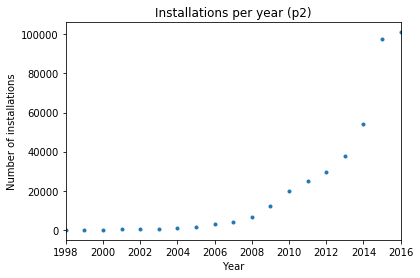

In [13]:
# plot installs per year
byYear.size().plot(marker='.', linestyle='none')
plt.xlabel("Year")
plt.ylabel("Number of installations")
plt.title('Installations per year (p2)') ;

In [14]:
# get the bigger file
dfLBNLp1 = pd.read_excel('../local/data/LBNL_openpv_tts_data/TTSX_LBNL_OpenPV_public_file_p1.xlsx')

In [15]:
# group it by year
byYear1 = dfLBNLp1.groupby(lambda x: dfLBNLp1.loc[x, 'Installation Date'].year)

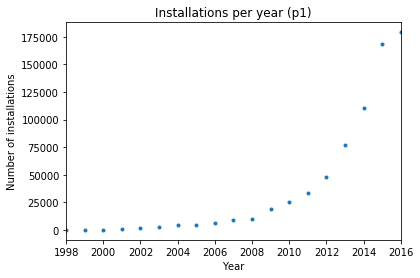

In [16]:
# how many
byYear1.size().plot(marker='.', linestyle='none')
plt.xlabel("Year")
plt.ylabel("Number of installations")
plt.title('Installations per year (p1)');

##### Put them together and save as csv and and do one plot for both.

In [17]:
# first look at df data
dfLBNLp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 52 columns):
Data Provider                                   700000 non-null object
System ID (from Data Provider)                  700000 non-null object
System ID (Tracking the Sun)                    700000 non-null object
Installation Date                               700000 non-null datetime64[ns]
System Size                                     700000 non-null float64
Total Installed Price                           700000 non-null float64
Appraised Value Flag                            700000 non-null bool
Sales Tax Cost                                  700000 non-null float64
Rebate or Grant                                 700000 non-null float64
Performance-Based Incentive (Annual Payment)    700000 non-null float64
Performance-Based Incentives (Duration)         700000 non-null int64
Feed-in Tariff (Annual Payment)                 700000 non-null int64
Feed-in Tariff (Duration)   

In [18]:
# put them together; now it's all one thing
dftts = dfLBNLp1.append(dfTTSp2)

In [19]:
# how big
len(dftts)

1094909

In [20]:
# just right
394909 + 700000

1094909

In [21]:
# now index
dftts.reset_index(inplace=True)

In [22]:
dftts.index.name='row_id'

In [23]:
dftts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094909 entries, 0 to 1094908
Data columns (total 53 columns):
index                                           1094909 non-null int64
Data Provider                                   1094909 non-null object
System ID (from Data Provider)                  1094909 non-null object
System ID (Tracking the Sun)                    1094909 non-null object
Installation Date                               1094909 non-null datetime64[ns]
System Size                                     1094909 non-null float64
Total Installed Price                           1094909 non-null float64
Appraised Value Flag                            1094909 non-null bool
Sales Tax Cost                                  1094909 non-null float64
Rebate or Grant                                 1094909 non-null float64
Performance-Based Incentive (Annual Payment)    1094909 non-null float64
Performance-Based Incentives (Duration)         1094909 non-null int64
Feed-in Tariff

In [24]:
# consolidate both input files into one csv file
dftts.to_csv('../local/data/LBNL_openpv_tts_data/TTS.csv')

In [25]:
# group everything by year
tts_by_year = dftts.groupby(lambda x: dftts.loc[x, 'Installation Date'].year)

In [26]:
# how many per year
tts_by_year.size()

1998        21
1999       172
2000       154
2001      1182
2002      2325
2003      3413
2004      5443
2005      5840
2006      9298
2007     13581
2008     16700
2009     30722
2010     44928
2011     57921
2012     77179
2013    115214
2014    164335
2015    266403
2016    280078
dtype: int64

Text(0.5,1,'Installations per year (p1 + p2)')

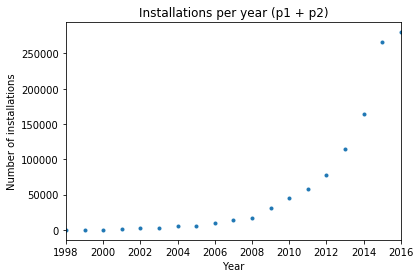

In [27]:
# show me a picture
tts_by_year.size().plot(marker='.', linestyle='none')
plt.xlabel("Year")
plt.ylabel("Number of installations")
plt.title('Installations per year (p1 + p2)')

In [28]:
# look for exact duplicates
rows_with_dups = dftts.duplicated(keep=False); rows_with_dups.sum()

0

In [29]:
# look good
dftts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094909 entries, 0 to 1094908
Data columns (total 53 columns):
index                                           1094909 non-null int64
Data Provider                                   1094909 non-null object
System ID (from Data Provider)                  1094909 non-null object
System ID (Tracking the Sun)                    1094909 non-null object
Installation Date                               1094909 non-null datetime64[ns]
System Size                                     1094909 non-null float64
Total Installed Price                           1094909 non-null float64
Appraised Value Flag                            1094909 non-null bool
Sales Tax Cost                                  1094909 non-null float64
Rebate or Grant                                 1094909 non-null float64
Performance-Based Incentive (Annual Payment)    1094909 non-null float64
Performance-Based Incentives (Duration)         1094909 non-null int64
Feed-in Tariff

In [30]:
# how many unique values in each column - runs fast
# good to know before doing value_counts on a column 
# (like installers that has large number of values and takes a long time).
col_numUnique = [(col, dftts[col].unique().size) for col in dftts.columns.tolist()]; col_numUnique

[('index', 700000),
 ('Data Provider', 66),
 ('System ID (from Data Provider)', 1025243),
 ('System ID (Tracking the Sun)', 1094909),
 ('Installation Date', 5512),
 ('System Size', 53346),
 ('Total Installed Price', 188653),
 ('Appraised Value Flag', 2),
 ('Sales Tax Cost', 93493),
 ('Rebate or Grant', 54999),
 ('Performance-Based Incentive (Annual Payment)', 2082),
 ('Performance-Based Incentives (Duration)', 6),
 ('Feed-in Tariff (Annual Payment)', 517),
 ('Feed-in Tariff (Duration)', 6),
 ('Customer Segment', 8),
 ('New Construction', 3),
 ('Tracking', 3),
 ('Tracking Type', 5),
 ('Ground Mounted', 3),
 ('Battery System', 3),
 ('Zip Code', 11757),
 ('City', 12843),
 ('County', 583),
 ('State', 26),
 ('Utility Service Territory', 528),
 ('Third-Party Owned', 3),
 ('Installer Name', 11462),
 ('Self-Installed', 3),
 ('Azimuth #1', 941),
 ('Azimuth #2', 362),
 ('Azimuth #3', 360),
 ('Tilt #1', 459),
 ('Tilt #2', 73),
 ('Tilt #3', 58),
 ('Module Manufacturer #1', 139),
 ('Module Manufact

In [31]:
# much faster than manually
for col, numUniq in col_numUnique:
    if numUniq < 12:
        print('====> ' + col + '<====')
        print(dftts[col].value_counts())
        print()

====> Appraised Value Flag<====
False    775331
True     319578
Name: Appraised Value Flag, dtype: int64

====> Performance-Based Incentives (Duration)<====
 0       1084799
-9999       7863
 20         1106
 10          725
 5           312
 1           104
Name: Performance-Based Incentives (Duration), dtype: int64

====> Feed-in Tariff (Duration)<====
 0       1093941
 15          681
 20          283
 10            2
-9999          1
 25            1
Name: Feed-in Tariff (Duration), dtype: int64

====> Customer Segment<====
RES           1005492
-9999           45717
COM             24949
NON-RES          9408
GOV              4516
SCHOOL           2383
NON-PROFIT       2371
TAX-EXEMPT         73
Name: Customer Segment, dtype: int64

====> New Construction<====
-9999    745498
 0       314867
 1        34544
Name: New Construction, dtype: int64

====> Tracking<====
 0       668268
-9999    423196
 1         3445
Name: Tracking, dtype: int64

====> Tracking Type<====
Fixed          

####  Survey of variables by importance; what type coercion is needed when I read this back as one df?

__Customer Segment: categorical => [res, com, non-res, gov, school, non-profit, tax-exempt, NaN(-9999)]__

```
====> Customer Segment<====
RES           1005492
-9999           45717
COM             24949
NON-RES          9408
GOV              4516
SCHOOL           2383
NON-PROFIT       2371
TAX-EXEMPT         73
Name: Customer Segment, dtype: int64
```

__Appraised Value Flag: Boolean__
```
====> Appraised Value Flag<====
False    775331
True     319578
Name: Appraised Value Flag, dtype: int64
```

__Third-Party Owned:  0 = False, 1 = True, -9999 = NaN __
```
====> Third-Party Owned<====
 1       458859
 0       421683
-9999    214367
Name: Third-Party Owned, dtype: int64
```

__New Construction: 0 = False, 1 = True, -9999 = NaN __
```
====> New Construction<====
-9999    745498
 0       314867
 1        34544
Name: New Construction, dtype: int64
```

__Ground Mounted: interesting! 0 = False, 1 = True, -9999 = NaN __
```
====> Ground Mounted<====
-9999    987064
 0        94161
 1        13684
Name: Ground Mounted, dtype: int64
```

##### These are new with this file.  There are enough to make this interesting.  uInverters are more expensive, but easier to config and install.

__Microinverter: 0 = False, 1 = True, -9999 = NaN__
```
====> Microinverter<====
 0       590862
-9999    280769
 1       223278
Name: Microinverter, dtype: int64
```

##### These are new with this file.  There are enough to make this interesting.  I forget what these do, but they seem popular?
__DC Optimizer: 0 = False, 1 = True, -9999 = NaN__
```
====> DC Optimizer<====
 0       687072
-9999    259107
 1       148730
Name: DC Optimizer, dtype: int64
```

### I don't think any of the below are going to make it into the model.  Tracking and battery are interesting but there aren't enough to work with.

__Performance-Based Incentives (Duration): -9999 means Nan, 0 means none, int means years__
```
====> Performance-Based Incentives (Duration)<====
 0       1084799
-9999       7863
 20         1106
 10          725
 5           312
 1           104
Name: Performance-Based Incentives (Duration), dtype: int64
```

__Feed-in Tariff (Duration):  -9999 means Nan, 0 means none, int means years__
```
====> Feed-in Tariff (Duration)<====
 0       1093941
 15          681
 20          283
 10            2
-9999          1
 25            1
Name: Feed-in Tariff (Duration), dtype: int64
```
__Tracking:  -9999 means Nan, 0 means False, 1 means True__
```====> Tracking<====
 0       668268
-9999    423196
 1         3445
Name: Tracking, dtype: int64
```

__Tracking Type: categorical, single, dual, mixed, NaN (-9999(
```====> Tracking Type<====
Fixed          663533
-9999          428199
Single-Axis      1344
Dual-Axis         956
Mixed             877
Name: Tracking Type, dtype: int64
```
__Battery System:  0 = False, 1 = True, -9999 = NaN __
```
====> Battery System<====
-9999    973202
 0       121528
 1          179
Name: Battery System, dtype: int64
```
__Self-Installed: 0 = False, 1 = True, -9999 = NaN __
```
====> Self-Installed <====
-9999    769575
 0       309703
 1        15631
Name: Self-Installed, dtype: int64
```
__Module Technology \#3, Module Technology \#2, Module Technology \#1__
```
====> Module Technology #3<====
-9999          1083058
Multi-c-Si        7120
Mono-c-Si         2321
Poly              1202
multiple           652
Mono               397
crystalline        107
Mono + a-Si         26
Thin Film           15
a-Si                 8
CIGS                 3
Name: Module Technology #3, dtype: int64
```
__BIPV Module \#1, BIPV Module \#2, BIPV Module \#3__
```
====> BIPV Module #1<====
 0       795107
-9999    293533
 1         6269
Name: BIPV Module #1, dtype: int64
```
```
====> BIPV Module #2<====
 0       795107
-9999    293533
 1         6269
Name: BIPV Module #2, dtype: int64
```
```
====> BIPV Module #3<====
 0       795107
-9999    293533
 1         6269
Name: BIPV Module #3, dtype: int64
```

In [32]:
dftts.head()

,index,Data Provider,System ID (from Data Provider),System ID (Tracking the Sun),Installation Date,System Size,Total Installed Price,Appraised Value Flag,Sales Tax Cost,Rebate or Grant,Performance-Based Incentive (Annual Payment),Performance-Based Incentives (Duration),Feed-in Tariff (Annual Payment),Feed-in Tariff (Duration),Customer Segment,New Construction,Tracking,Tracking Type,Ground Mounted,Battery System,Zip Code,City,County,State,Utility Service Territory,Third-Party Owned,Installer Name,Self-Installed,Azimuth #1,Azimuth #2,Azimuth #3,Tilt #1,Tilt #2,Tilt #3,Module Manufacturer #1,Module Manufacturer #2,Module Manufacturer #3,Module Model #1,Module Model #2,Module Model #3,Module Technology #1,Module Technology #2,Module Technology #3,BIPV Module #1,BIPV Module #2,BIPV Module #3,Module Efficiency #1,Module Efficiency #2,Module Efficiency #3,Inverter Manufacturer,Inverter Model,Microinverter,DC Optimizer
row_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,Arkansas State Energy Office,-9999,AR_EDC_1,2010-04-29,2.016,14558.0,False,510.762764,0.0,3644.64,1,0.0,0,RES,-9999,0,Fixed,0,-9999,71953,Mena,Polk,AR,SWEPCO,0,Liberty Solar Solutions,0,-9999.0,-9999,-9999,-9999.0,-9999,-9999,Sharp,Sharp,Sharp,ND-224UC1,no match,no match,Multi-c-Si,-9999,-9999,0,0,0,0.142431,-9999.0,-9999.0,Enphase Energy,-9999,1,0
1,1,Arkansas State Energy Office,-9999,AR_EDC_2,2010-04-26,3.360,26096.0,False,851.271273,0.0,7210.50,1,0.0,0,RES,-9999,0,Fixed,0,-9999,72641,Jasper,Newton,AR,Carroll Electric,0,Liberty Solar Solutions,0,-9999.0,-9999,-9999,-9999.0,-9999,-9999,Sharp,Sharp,Sharp,ND-224UC1,no match,no match,Multi-c-Si,-9999,-9999,0,0,0,0.142431,-9999.0,-9999.0,Enphase Energy,-9999,1,0
2,2,Arkansas State Energy Office,-9999,AR_EDC_3,2010-04-20,13.440,91139.0,False,3405.085091,0.0,25178.97,1,0.0,0,RES,-9999,0,Fixed,0,-9999,71801,Hope,Hempstead,AR,Hope Water & Light,0,Liberty Solar Solutions,0,-9999.0,-9999,-9999,-9999.0,-9999,-9999,Sharp,Sharp,Sharp,ND-224UC1,no match,no match,Multi-c-Si,-9999,-9999,0,0,0,0.142431,-9999.0,-9999.0,Enphase Energy,-9999,1,0
3,3,Arkansas State Energy Office,-9999,AR_EDC_4,2010-04-21,5.520,40043.0,False,1398.517091,0.0,10724.34,1,0.0,0,RES,-9999,0,Fixed,0,-9999,71909,Hot Springs Village,Saline,AR,First Electric,0,Liberty Solar Solutions,0,-9999.0,-9999,-9999,-9999.0,-9999,-9999,Sharp,Sharp,Sharp,NU-U230F3,no match,no match,Mono-c-Si,-9999,-9999,0,0,0,0.141090,-9999.0,-9999.0,Enphase Energy,-9999,1,0
4,4,Arkansas State Energy Office,-9999,AR_EDC_5,2010-04-22,2.530,21497.0,False,640.987000,0.0,3736.17,1,0.0,0,RES,-9999,0,Fixed,0,-9999,71909,Hot Springs Village,Garland,AR,Entergy,0,Liberty Solar Solutions,0,-9999.0,-9999,-9999,-9999.0,-9999,-9999,Sharp,Sharp,Sharp,NU-U230F3,no match,no match,Mono-c-Si,-9999,-9999,0,0,0,0.141090,-9999.0,-9999.0,Enphase Energy,-9999,1,0
